In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mglearn
import pandas as pd

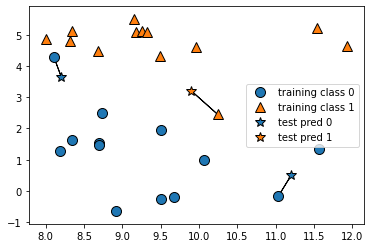

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

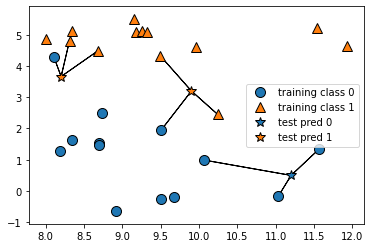

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
X_train.shape

(19, 2)

In [13]:
X_test.shape

(7, 2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [18]:
clf.score(X_test, y_test)

0.8571428571428571

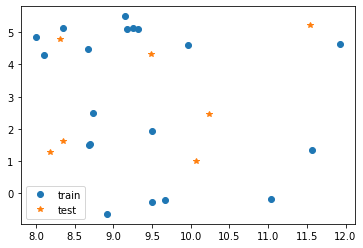

In [25]:
plt.plot(X_train[:, 0], X_train[:, 1], "o", label="train")
plt.plot(X_test[:, 0], X_test[:, 1], "*", label="test")
plt.legend()

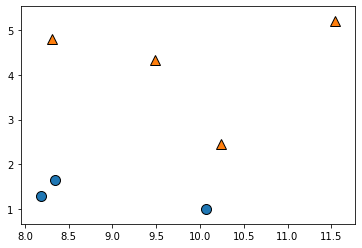

In [27]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


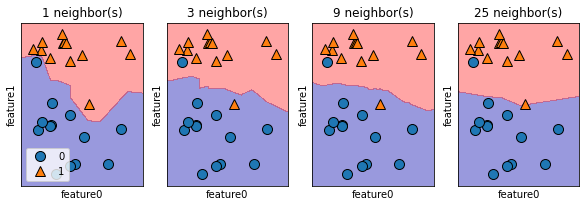

In [52]:
flg, axes = plt.subplots(1, 4, figsize=(10, 3))

print(axes)
for n, ax in zip([1, 3, 9, 25], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f'{n} neighbor(s)')
    ax.set_xlabel('feature0')
    ax.set_ylabel('feature1')
axes[0].legend(loc=3)

平滑な境界はシンプルなモデルである  
nの数が小さすぎると複雑なモデルになっている